In [1]:
# What is the machine learning problem you are trying to solve?


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline


# Data

### Reading Data

In [22]:
def read_data():
    missing_values = ["na", "--", ""]
    data = pd.read_csv("Airlines.csv", na_values=missing_values)
    return data

data = read_data()
print(data.head())

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0


### Cleaning Data

To clean the data, we first check to see if there are any null values. In our dataset there are none, so we don't need to worry about deleting rows or replacing null values with mean or median values. We also check that each row is of the correct type (for example, all the 'Time' values are actual integer values). Finally, we remove any duplicates found.

Overall our data was very clean, so this step was simpler compared to the feature engineering and exploration steps.

In [23]:
def check_type(data, col_name, type):
        cnt=0
        num_errors = 0
        for i, row in enumerate(data[col_name]):  
            if i == 0: continue
            try:
                type(row)
                pass
            except ValueError:
                print(data.loc[cnt, col_name])
                data.loc[cnt, col_name]=np.nan 
                num_errors += 1
            cnt+=1
        print(f"number of incorrect types for {col_name}: {num_errors}")
        return num_errors

def clean_data(data):
    # check number of null values
    print(f"Number of null values: {data.isnull().sum().sum()}")

    # checking the types of all the columns
    check_type(data, "Airline", str)
    check_type(data, "Flight", int)
    check_type(data, "AirportFrom", str)
    check_type(data, "AirportTo", str)
    check_type(data, "DayOfWeek", int)
    check_type(data, "Time", int)
    check_type(data, "Length", int)
    check_type(data, "Delay", int)

def check_duplicates(data):
    count = len(data)
    data.drop_duplicates(inplace=True)
    count -= len(data)
    print(f"Number of duplicate rows: {count}")


clean_data(data)
check_duplicates(data)

Number of null values: 0
number of incorrect types for Airline: 0
number of incorrect types for Flight: 0
number of incorrect types for AirportFrom: 0
number of incorrect types for AirportTo: 0
number of incorrect types for DayOfWeek: 0
number of incorrect types for Time: 0
number of incorrect types for Length: 0
number of incorrect types for Delay: 0
Number of duplicate rows: 0


There are a lot of airports so we need to reduce the number. We'll drop the airports below a certain threshold that don't have enough flights.

In [5]:
# def reduce_airport_in(data):
#     # Distribution of AirportsTo
#     groups = data.groupby('AirportTo', sort = True)
#     # Mean is 1840, so I'll delete anything below 1000
#     airlines_sizes = groups.size()
    
#     airlines_sizes = airlines_sizes[airlines_sizes > 1000]
#     print(data.shape)
#     data = data[(data['AirportTo'].isin(airlines_sizes.index)) & (data['AirportFrom'].isin(airlines_sizes.index))]
#     print(data.shape)

#     airport_from_group = data.groupby('AirportFrom', sort = True)
#     airport_from_sizes = airport_from_group.size()
#     airport_from_sizes = airport_from_sizes[airport_from_sizes > 1000]
#     print(data.shape)
#     data = data[(data['AirportFrom'].isin(airport_from_sizes.index)) & (data['AirportFrom'].isin(airport_from_sizes.index))]
#     print(data.shape)




    # data = data[data['AirportTo'] not in airlines_sizes.keys()]
    # print(data['AirportTo'] not in airlines_sizes.keys())
    # plt.figure(figsize=(10, 8))
    # airlines_sizes.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', wedgeprops=dict(width=0.3))
    # plt.title('Distribution of Airlines Levels')
    # plt.show()
# reduce_airport_in(data)

### Data Exploration

We are going to explore the distributions of some our features, look at the balance between both test sets, as well as some other statistics that might provide more insight into what we are doing. 


Data Statistics

In [34]:
# Distribution of Day of the Week
dayofweek_distribution = data['DayOfWeek'].value_counts()

# Calculate the total number of flights on weekends (Saturday and Sunday)
weekend_flights = dayofweek_distribution[6] + dayofweek_distribution[7]

# Calculate the total number of flights on weekdays (Monday to Friday)
weekday_flights = sum(dayofweek_distribution[1:6])

print("Average Number of Flights on Weekends (Saturday and Sunday):", (weekend_flights / 2))
print("Average Number of Flights on Weekdays (Monday to Friday):", (weekday_flights / 5))
print()
delays = data['Delay'].value_counts()
print(delays)

flights_delayed = (delays[1] / (delays[0] + delays[1])) * 100
print()
print(str(flights_delayed) + " percent of flights were delayed")



Average Number of Flights on Weekends (Saturday and Sunday): 64417.5
Average Number of Flights on Weekdays (Monday to Friday): 77796.4

Delay
0    299119
1    240264
Name: count, dtype: int64

44.544229239705366 percent of flights were delayed


From this, we know we don't have to worry too much about class imbalance, because the classes are nearly equal. Additionally, we now know that on average there are more flights coming in on weekdays. This might lead to more congestion at the airports and can potentially cause delays

Data Visualizations

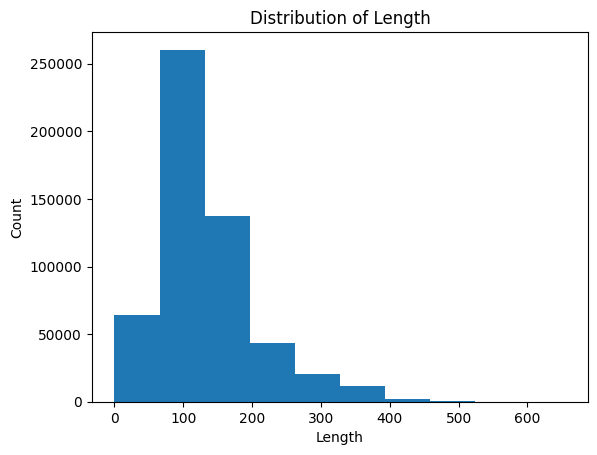

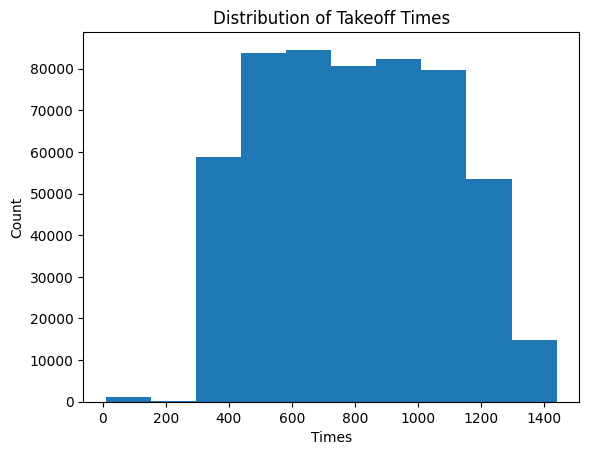

The mean takeoff time is 802.7289625368245 minutes after midnight


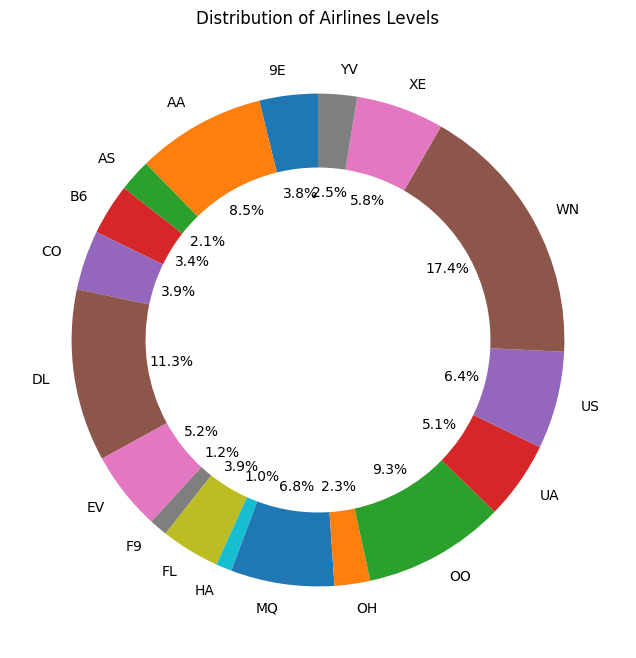

In [26]:
# Distribution of Length
len_dist = data['Length']
len_dist.plot(kind='hist', title='Distribution of Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


#Distribution of Time
times = data['Time']
times.plot(kind = 'hist', title = "Distribution of Takeoff Times")
plt.xlabel("Times")
plt.ylabel("Count")
plt.show()

print("The mean takeoff time is " + str(times.mean()) + " minutes after midnight")

# Distribution of Airlines
groups = data.groupby('Airline')
airlines_sizes = groups.size()
plt.figure(figsize=(10, 8))
airlines_sizes.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', wedgeprops=dict(width=0.3))
plt.title('Distribution of Airlines Levels')
plt.show()


These plots just give us some insight into how some of our features is distributed. Looking at the pie chart, we notice that there are some airlines that are flown more often then other. Furthermore the distributions of takeoff time and length let us see which takeoff times and lengths are more frequent. 

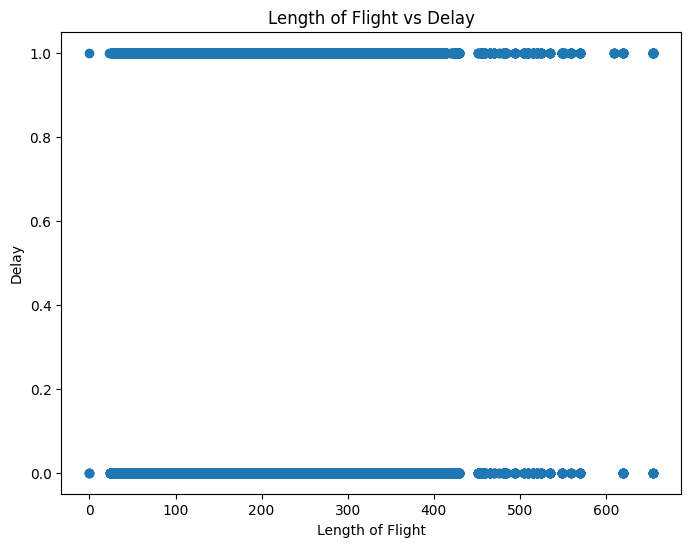

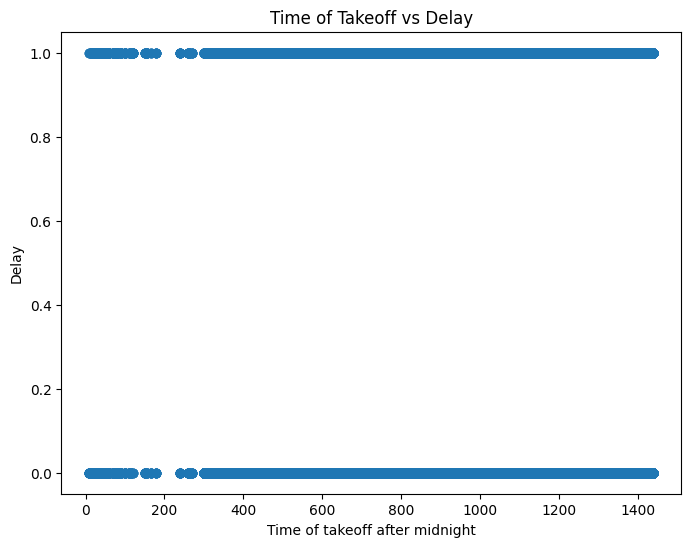

In [38]:
length = data['Length']
delay = data['Delay']
plt.figure(figsize=(8, 6))
plt.scatter(length, delay)
plt.xlabel("Length of Flight")
plt.ylabel("Delay")
plt.title("Length of Flight vs Delay")
plt.show()

time = data['Time']
plt.figure(figsize=(8, 6))
plt.scatter(time, delay)
plt.xlabel("Time of takeoff after midnight")
plt.ylabel("Delay")
plt.title("Time of Takeoff vs Delay")
plt.show()

From this plot, we can see that there doesn't really seem to be a relationship between a direct flight of just how long a flight is or just when it took off and if it is delayed or not.

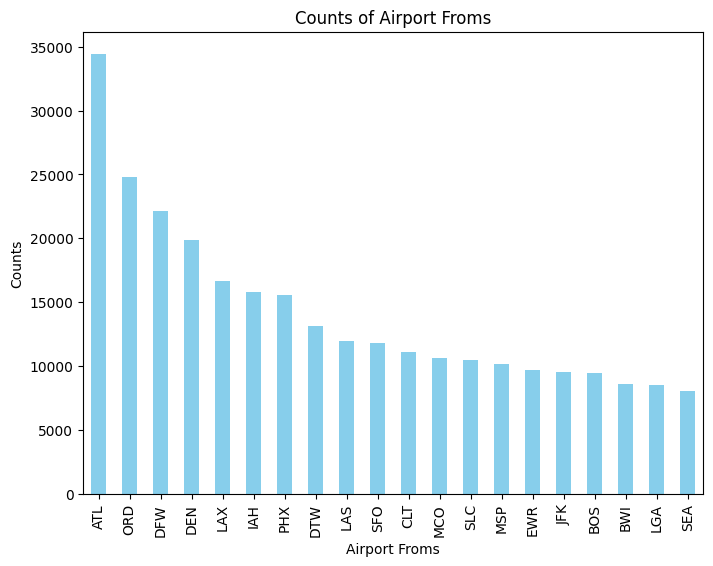

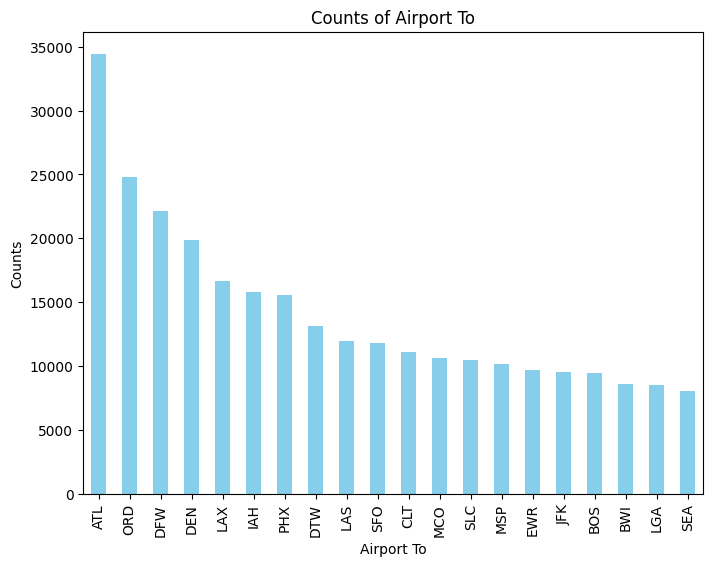

In [41]:
airport_from_counts = data['AirportFrom'].value_counts()
airport_from_counts = airport_from_counts.head(20)
airport_from_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.xlabel("Airport Froms")
plt.ylabel("Counts")
plt.title("Counts of Airport Froms")
plt.show()

airport_to_counts = data['AirportTo'].value_counts()
airport_to_counts = airport_from_counts.head(20)
airport_to_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.xlabel("Airport To")
plt.ylabel("Counts")
plt.title("Counts of Airport To")
plt.show()

These plots show the 20 most popular airports from and too. Some airports that are more popular, will probably have more airport congestion which might lead to more delays. Thus, we should probably include some sort of feature, that shows which airports are the most popular so our Machine Learning model can account for this

### Feature Engineering

First, we're going to drop a few columns such as the id and Flight number, since they won't have an impact on our model and will probably only add uneeded dimensions.

In [10]:
# drop unneeded columns
remove_cols = ["id", "Flight"]
data = data.drop(remove_cols, axis=1)

We now want to perform some feature engineering to augment our data a bit. Using the length of each flight, we created an 'isLongFlight' variable that classifies flights as long or not.

We also created an 'isWeekday' variable since we noticed in our exploration that nearly half the flights were on weekends, so there might be some significance with which part of the week the flight is in. 

Finally, we added a 'TimeOfDay' variable that gives each flight a different classification for departure: Early Morning = 0, Morning = 1, Afternoon = 2, and Evening = 3. We decided to do this because currently the 'Time' variable is the time from midnight and could eventually contain very large numbers. Instead, we thought simply categorizing the time of takeoff may yield a better/simpler result for the models. 

In [11]:
#Early Morning: 0, Morning: 1, Afternoon: 2, Evening: 3
time_of_days = {0 : 420, 1: 720, 2 : 1440}

def get_time_of_day(time):
    for time_period in time_of_days:
        time_of_day = time_of_days[time_period]
        if time < time_of_day:
            return time_period
    return 3  # Default to evening if time is beyond the defined thresholds

def is_weekday(date):
    return date < 6

threshold_length = data["Length"].mean()
data['isLongFlight'] = data['Length'].apply(lambda x: 1 if x > threshold_length else 0)
data['TimeOfDay'] = data['Time'].apply(get_time_of_day)
data['isWeekday'] = data['DayOfWeek'].apply(is_weekday)
#We no longer need the time since we know around what time of day it was
data = data.drop('Time', axis = 1)

print(data.head())


  Airline AirportFrom AirportTo  DayOfWeek  Length  Delay  isLongFlight   
0      CO         SFO       IAH          3     205      1             1  \
1      US         PHX       CLT          3     222      1             1   
2      AA         LAX       DFW          3     165      1             1   
3      AA         SFO       DFW          3     195      1             1   
4      AS         ANC       SEA          3     202      0             1   

   TimeOfDay  isWeekday  
0          0       True  
1          0       True  
2          0       True  
3          0       True  
4          0       True  


Now, we wanted to modify the AirportFrom and AirportTo columns. 

Rather than one-hot encoding this column (there are almost 300 airports to encode), we decided to use a different method by replacing the ariport string name with it's 'popularity' or importance. We do this by counting the number of times this airport appears in flight records, both in AirportFrom and AirportTo using the mean, and use this frequency to represent the airport itself rather than its name. This will be more useful for models since its a number and since it represents the popularity of the airport.

In [12]:
airport_to_counts = data.groupby("AirportTo").size()
airport_from_counts = data.groupby("AirportFrom").size()

airport_encoder = (airport_from_counts + airport_to_counts) / 2

data["AirportFrom"] = data["AirportFrom"].map(airport_encoder)
data["AirportTo"] = data["AirportTo"].map(airport_encoder)

We do the same thing for the Airline column

In [13]:
airline_encoder = data.groupby("Airline").size()
data["Airline"] = data["Airline"].map(airline_encoder)
print(data.head())

   Airline  AirportFrom  AirportTo  DayOfWeek  Length  Delay  isLongFlight   
0    21118      11789.0    15820.0          3     205      1             1  \
1    34500      15557.5    11132.5          3     222      1             1   
2    45656      16656.5    22153.5          3     165      1             1   
3    45656      11789.0    22153.5          3     195      1             1   
4    11471       1309.0     8040.0          3     202      0             1   

   TimeOfDay  isWeekday  
0          0       True  
1          0       True  
2          0       True  
3          0       True  
4          0       True  


# Models

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

labels = data["Delay"].values.ravel()
features = data.drop("Delay", axis=1)
tree = DecisionTreeClassifier()
hyperparams = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_leaf": [5, 10, 15, 20, 25]
}

grid_search = GridSearchCV(tree, hyperparams, cv=5, scoring='accuracy')
grid_search.fit(features, labels)

Decision_Tree_Model = grid_search.best_estimator_

print(grid_search.best_params_, grid_search.best_score_)
nested_score = cross_val_score(grid_search, features, labels, cv=5)
print("Accuracy:", nested_score.mean()*100)

{'max_depth': None, 'min_samples_leaf': 5} 0.6328712546327339


KeyboardInterrupt: 

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
svc = SVC()

pipe = Pipeline([
    ('scaler', scaler),
    ('SVC', svc)
])

param_grid = {
    'SVC__kernel': ['linear', 'rbf', 'poly'],
    'SVC__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(features, labels)
print(grid_search.best_params_, grid_search.best_score_)

SVM_model = grid_search.best_estimator_

cross_val_accuracy = cross_val_score(grid_search, features, labels, cv=5)
print("Accuracy:", cross_val_accuracy.mean() * 100)




NameError: name 'features' is not defined

In [11]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

forest = RandomForestClassifier()

labels = data["Delay"].values.ravel()
features = data.drop("Delay", axis=1)

hyperparams = {
    'n_estimators': [5, 10, 15],  # Number of trees in the forest
    'max_depth': [5, 10, None],  # Maximum depth of each tree
    'min_samples_leaf': [5, 10, 15]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(forest, hyperparams, cv=5, scoring='accuracy')
grid_search.fit(features, labels)

Random_Forest_Model = grid_search.best_estimator_

print(grid_search.best_params_, grid_search.best_score_)

nested_score = cross_val_score(grid_search, features, labels, cv=5)
print("Accuracy:", nested_score.mean() * 100)

{'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 15} 0.6487449625310622
Accuracy: 64.8769063143232
